# Import packages and load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
pd.set_option('display.float_format', lambda x: '%.5f' % x) # this is to avoid scientific notations

In [2]:
# Let's extract the year of each review and remove the id columns-these often don't help with analytical purposes
data = pd.read_csv('beer_reviews.csv', low_memory=False)
data['review_time'] = pd.to_datetime(data['review_time'], unit = 's')
data['year'] = data['review_time'].dt.year
data.drop(columns = ['brewery_id','beer_beerid'], inplace=True)

In [6]:
data.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,year
count,1586614.00000,1586614.00000,1586614.00000,1586614.00000,1586614.00000,1518829.00000,1586614.00000
mean,7.63116,7.47127,7.68328,7.48740,7.58572,7.04239,2008.28165
std,1.44124,1.39523,1.23219,1.36444,1.46394,2.32253,2.42618
min,0.00000,2.00000,0.00000,2.00000,2.00000,0.01000,1996.00000
25%,7.00000,7.00000,7.00000,7.00000,7.00000,5.20000,2007.00000
50%,8.00000,8.00000,8.00000,8.00000,8.00000,6.50000,2009.00000
75%,9.00000,8.00000,8.00000,8.00000,9.00000,8.50000,2010.00000
max,10.00000,10.00000,10.00000,10.00000,10.00000,57.70000,2012.00000


# Preprocess data

In [3]:
# Rescale the individual rating scores to integers (1-10) instead of float values 
# since whole numbers just seem more intuitive
data['review_overall'] = data['review_overall'] * 2
data['review_aroma'] = data['review_aroma'] * 2
data['review_appearance'] = data['review_appearance'] * 2
data['review_palate'] = data['review_palate'] * 2
data['review_taste'] = data['review_taste'] * 2

In [5]:
# Let's take a look at the frequency distribution of the reviews throughout the years
data.groupby(['year']).count()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv
year,,,,,,,,,,,
1996,1,1,1,1,1,1,1,1,1,1,1
1998,133,133,133,133,133,133,133,133,133,133,72
1999,86,86,86,86,86,86,86,86,86,86,33
2000,119,119,119,119,119,119,119,119,119,119,98
2001,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1773
2002,23139,23140,23140,23140,23140,23140,23140,23140,23140,23140,20776
2003,56958,56958,56958,56958,56958,56955,56958,56958,56958,56958,52117
2004,69701,69701,69701,69701,69701,69646,69701,69701,69701,69701,64888
2005,89115,89116,89116,89116,89116,89060,89116,89116,89116,89116,83607


In [7]:
# Seems like data from before 2002 and year 2012 have too few records comparing to the rest
# let's exclude these ones
data = data[~data.year.isin(['1996', '1998', '1999', '2000', '2001', '2012'])]

In [14]:
data.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,year
count,1574612.00000,1574612.00000,1574612.00000,1574612.00000,1574612.00000,1507509.00000,1574612.00000
mean,7.63096,7.47082,7.68309,7.48699,7.58512,7.03996,2008.27009
std,1.44129,1.39491,1.23166,1.36388,1.46334,2.32090,2.40000
min,0.00000,2.00000,0.00000,2.00000,2.00000,0.01000,2002.00000
25%,7.00000,7.00000,7.00000,7.00000,7.00000,5.20000,2007.00000
50%,8.00000,8.00000,8.00000,8.00000,8.00000,6.50000,2009.00000
75%,9.00000,8.00000,8.00000,8.00000,9.00000,8.50000,2010.00000
max,10.00000,10.00000,10.00000,10.00000,10.00000,57.70000,2011.00000


In [6]:
# An overview of overall ratings over the years, this is to show that consumers tend to give very favorable
# reviews to the beers over the years (even the 25th percentile is 7.0!)
data.groupby(['year'])['review_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2002,23140.00000,7.54581,1.63440,0.00000,7.00000,8.00000,9.00000,10.00000
2003,56958.00000,7.46194,1.56070,2.00000,7.00000,8.00000,8.00000,10.00000
2004,69701.00000,7.55121,1.51918,2.00000,7.00000,8.00000,9.00000,10.00000
2005,89116.00000,7.58259,1.52740,2.00000,7.00000,8.00000,9.00000,10.00000
2006,129648.00000,7.57033,1.49599,2.00000,7.00000,8.00000,9.00000,10.00000
2007,142404.00000,7.57336,1.48007,2.00000,7.00000,8.00000,9.00000,10.00000
2008,210099.00000,7.64192,1.44986,2.00000,7.00000,8.00000,9.00000,10.00000
2009,243402.00000,7.70166,1.41238,2.00000,7.00000,8.00000,9.00000,10.00000
2010,277072.00000,7.70227,1.41591,2.00000,7.00000,8.00000,9.00000,10.00000


In [19]:
# Now let's take a look at the number of records for each beer name.
data.groupby(['brewery_name'])['beer_name'].nunique().describe()

count   3064.00000
mean       6.52839
std       10.09436
min        1.00000
25%        1.00000
50%        3.00000
75%        7.00000
max      149.00000
Name: beer_name, dtype: float64

In [10]:
# We see that most beers receive fewer than 10 reviews each
# statistically speaking, it is not reliable to look at those with fewer than 10 reviewers 
# it can easily be biased so let's also throw these away
data = data.groupby(['beer_name']).filter(lambda x: x['review_overall'].count() > 10)

In [11]:
data.head()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,year
10,Amstel Brouwerij B. V.,2002-01-13 23:09:52,6.00000,4.00000,6.00000,fodeeoz,Light Lager,5.00000,5.00000,Amstel Light,3.50000,2002
18,Amstel Brouwerij B. V.,2002-01-12 18:44:46,5.00000,6.00000,6.00000,jdhilt,Light Lager,4.00000,4.00000,Amstel Light,3.50000,2002
20,Caldera Brewing Company,2011-12-31 19:46:52,8.00000,8.00000,8.00000,zaphodchak,Rauchbier,6.00000,8.00000,Rauch Ür Bock,7.40000,2011
21,Caldera Brewing Company,2011-11-28 18:51:44,8.00000,9.00000,8.00000,Tilley4,Rauchbier,7.00000,8.00000,Rauch Ür Bock,7.40000,2011
22,Caldera Brewing Company,2011-11-05 11:59:57,9.00000,10.00000,9.00000,mikedrinksbeer2,Rauchbier,8.00000,9.00000,Rauch Ür Bock,7.40000,2011


In [15]:
# Last but not least, 
# it's easier to create a single metric to find the winner(s) - this metric
# should satisfy these criteria: aroma, appearance, palate, taste and overall likeability
data['beer_quality'] = (data['review_aroma'] 
                        + data['review_appearance']
                        + data['review_palate'] 
                        + data['review_taste'] 
                        + data['review_overall'])/5

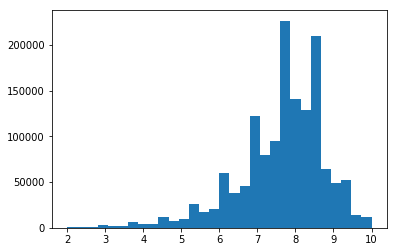

In [13]:
# let's check the distribution of this new metric
plt.hist(data['beer_quality'], bins = 30)
plt.show()

In [228]:
# Optional step: perform transformation to reduce the skewness of the distribution 
# this is helpful if you want to build a ML model later on
from scipy import stats
data['beer_quality'] = stats.boxcox(data['beer_quality'])[0]

In [229]:
data['beer_quality'].skew()

-0.05773373612457312

In [403]:
# last step - store the cleaned dataset in a new file
data.to_csv('beer_reviews_cleaned', index = True)

# Explore the data

## Beer style

In [20]:
# Top 10 beer style with the highest quality
data.groupby(['beer_style'])['beer_quality'].agg('mean').sort_values(ascending=False).head(10)

beer_style
Quadrupel (Quad)                   8.26295
American Double / Imperial Stout   8.25536
Russian Imperial Stout             8.21903
Eisbock                            8.17280
American Wild Ale                  8.16882
Gueuze                             8.16635
American Double / Imperial IPA     8.11610
Lambic - Unblended                 8.07142
Weizenbock                         8.05197
Flanders Red Ale                   8.03897
Name: beer_quality, dtype: float64

In [19]:
data.groupby(['year'])['beer_style'].nunique()

year
2002     98
2003    103
2004    103
2005    103
2006    104
2007    104
2008    104
2009    104
2010    104
2011    104
Name: beer_style, dtype: int64

In [20]:
# Top 10 most popular beer styles
data.beer_style.value_counts().head(5)

American IPA                        109889
American Double / Imperial IPA       82574
American Pale Ale (APA)              56879
Russian Imperial Stout               52117
American Double / Imperial Stout     48471
Name: beer_style, dtype: int64

In [24]:
top5 = data.beer_style.value_counts().head(5)
total = data.beer_style.value_counts()
top5.sum()/total.sum()

0.24038194027031204

In [220]:
# Top 10 least popular beer styles
data.beer_style.value_counts().tail(10) 
# see that Lambic - Unblended beer style? it's not a popular but apparently high quality beer
# we might have found a hidden gem! 955 reviews are considerably reliable eh?

Lambic - Unblended                 955
Bière de Champagne / Bière Brut    948
Braggot                            903
Low Alcohol Beer                   888
Gose                               597
Faro                               537
English Pale Mild Ale              415
Roggenbier                         337
Kvass                              179
Happoshu                            85
Name: beer_style, dtype: int64

In [ ]:
# are certain beer styles perceived as good quality? 
# let's look at the correlation between beer_quality and beer_style counts

## Brewery name

In [27]:
# Top 10 breweries in terms of rating
top10breweries = pd.DataFrame(data.groupby(['brewery_name'])['beer_quality'].agg(['mean','count']).sort_values(by = 'mean', ascending=False).head(10))
top10breweries.reset_index(inplace=True)

In [31]:
data.brewery_name.value_counts().head(5)

Boston Beer Company (Samuel Adams)    38955
Dogfish Head Brewery                  33447
Stone Brewing Co.                     32651
Sierra Nevada Brewing Co.             28267
Bell's Brewery, Inc.                  24926
Name: brewery_name, dtype: int64

In [36]:
top5brew = data.brewery_name.value_counts().head(5).sum()
total_brew = data.brewery_name.value_counts().sum()
top5brew/total_brew

0.10870597125143829

In [406]:
# Top 10 highest quality breweries with number of brands and their position
beers_ratings = pd.DataFrame(data.groupby(['brewery_name'])['beer_name'].nunique().sort_values(ascending=False))

In [407]:
merged = pd.merge(left = top10breweries, right = beers_ratings, left_on = 'brewery_name', right_on = 'brewery_name')

In [408]:
# Top 10 breweries with the number of brands
merged.head()

,brewery_name,mean,count,beer_name
0,Binghams Brewery,9.60000,1,1
1,Peg's Cantina & Brewpub / Cycle Brewing,9.46471,34,2
2,Black Swan Brewpub,9.40000,1,1
3,Micro Cervejaria Falke Bier,9.20000,1,1
4,Paulaner Brauhaus (Pulana Pijiu Fang),9.20000,1,1


In [41]:
# beer reviewers
data.groupby(['review_profilename'])['beer_abv'].mean().describe()

count   32054.00000
mean        7.06063
std         1.90308
min         0.30000
25%         5.73333
50%         6.85777
75%         8.00000
max        41.00000
Name: beer_abv, dtype: float64

## Beer aroma

In [397]:
# Top 10 beer with the best aroma
data.groupby(['beer_name'])['review_aroma'].agg(['mean', 'count']).sort_values(by ='mean',ascending = False).head(5)

,mean,count
beer_name,,
M Belgian-Style Barleywine,9.57143,28
Rare D.O.S.,9.51515,33
Papier (Bourbon Barrel),9.50000,12
Pliny The Younger,9.44754,610
Vanilla Bean Aged Dark Lord,9.43421,152


## Beer appearance

In [396]:
data.groupby(['beer_name'])['review_appearance'].agg(['mean','count']).sort_values(by = 'mean',ascending = False).head(5)   

,mean,count
beer_name,,
Cantillon Blåbær Lambik,9.28571,154
The Abyss,9.18835,1391
The Viking,9.18750,16
St-Ambroise Stout Impériale Russe,9.18310,71
Hunahpu's Imperial Stout,9.17564,427


## Beer palate

In [394]:
data.groupby(['beer_name'])['review_palate'].agg(['mean','count']).sort_values(by = 'mean',ascending = False).head(5)

,mean,count
beer_name,,
M Belgian-Style Barleywine,9.60714,28
Rare D.O.S.,9.60606,33
Vanilla Bean Aged Dark Lord,9.34868,152
Armand'4 Oude Geuze Lente (Spring),9.33846,65
Twisted Reality Barleywine,9.27273,11


## Beer taste

In [393]:
data.groupby(['beer_name'])['review_taste'].agg(['mean','count']).sort_values(by='mean',ascending = False).head(5)

,mean,count
beer_name,,
Cascade Sang Noir,9.84615,13
M Belgian-Style Barleywine,9.71429,28
Rare D.O.S.,9.69697,33
Veritas 005,9.61538,13
Royal Oil,9.60000,15


## Beer quality

In [392]:
data.groupby(['beer_name'])['beer_quality'].agg(['mean','count']).sort_values(by='mean', ascending=False).head(5)

,mean,count
beer_name,,
Rare D.O.S.,9.49091,33
M Belgian-Style Barleywine,9.47143,28
Armand'4 Oude Geuze Lente (Spring),9.34769,65
Veritas 005,9.32308,13
Dirty Horse,9.27179,39


## Beer quality over the years

In [402]:
data.groupby(['year'])['beer_quality'].agg(['mean','count'])
# the rating seemed to increased over time, even with more reviews

,mean,count
year,,
2002,7.44858,20981
2003,7.41476,51300
2004,7.50214,63092
2005,7.53259,81417
2006,7.51690,120024
2007,7.50828,133371
2008,7.59381,198203
2009,7.65482,228641
2010,7.67901,257955
